In [ ]:
!pip install opencv-python # NOTE: *not* opencv-contrib-pythonpython
!pip install easyocr

**Mounted Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**easyOCR**

In [9]:
from easyocr import Reader
import matplotlib.pyplot as plt
import cv2
import glob
import os
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

from PIL import Image

In [14]:
path_to_image = "/content/easyOCR_test.jpg"
image = cv2.imread(path_to_image)

In [15]:
reader = Reader(['en'])
result = reader.readtext(path_to_image)
result

[([[457.96667006423115, 593.0766894303488],
   [661.1123838376749, 482.2184174694688],
   [683.0333299357688, 539.9233105696512],
   [480.8876161623252, 650.7815825305312]],
  'STOLEN',
  0.9992014490440932),
 ([[373.5729879959199, 707.7211471820476],
   [740.8552527499621, 492.09374645325505],
   [842.4270120040801, 720.2788528179524],
   [476.14474725003794, 935.9062535467449]],
  'HubKZ2',
  0.0482776168186981),
 ([[337.8905996075495, 641.3358994113244],
   [391.4142135623731, 612.5857864376269],
   [399.1094003924505, 629.6641005886756],
   [345.5857864376269, 658.4142135623731]],
  '@eviven',
  0.5552930166353506)]

[INFO] 0.9992: STOLEN
[INFO] 0.0483: HubKZ2
[INFO] 0.5553: @eviven


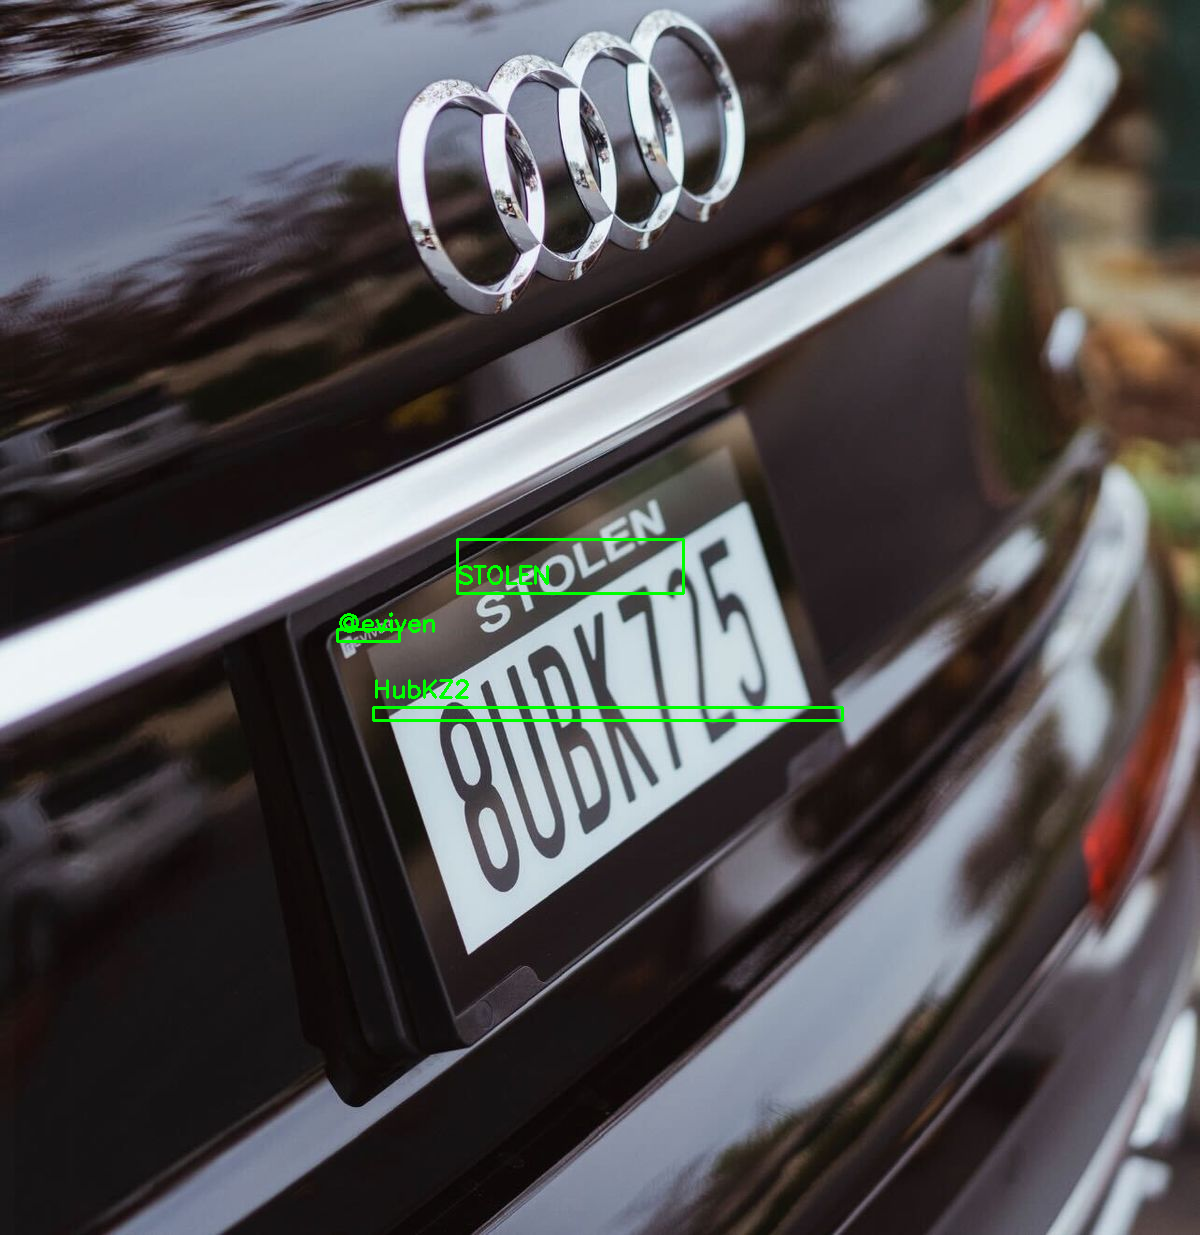

In [16]:
# loop over the results
for (bbox, text, prob) in result:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))
	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))
	# cleanup the text and draw the box surrounding the text along
	# with the OCR'd text itself
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
# show the output image
cv2_imshow(image)